# **Finding Patterns in FAANG Security Data**
---
- 0 if return is negative
- 1 if return is positive 

### Import Libraries

In [1]:
import os
import warnings

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 227

from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

### Import Data

In [2]:
ticker = 'FB'
#ticker = 'AAPL'
#ticker = 'AMZN'
#ticker = 'NFLX'
#ticker = 'GOOG'

# Colors
lightblue = '#4ac2fb'
pinkyred = '#ff4e97'
darkpink = '#cc3d78'
limegreen = '#b7de24'
darkgreen = '#96b71c'
black= '#333333'

In [3]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)
print(files)

['amzn.csv', 'fb.csv', 'nflx.csv', 'goog.csv', 'aapl.csv']


---
# Pattern Recognition
---

### Identify Desired Pattern

In [4]:
step = 9
window = 252

### Split Data for Training and Testing 

In [5]:
all_entries = stocks[ticker.lower()].shape[0]
window_1 = all_entries-window
window_2 = all_entries-(window*2)
test_w3 = window_2-window
train_w4 = test_w3-window
pattern = window_2 + step + 1
print(f'{ticker.upper()} historical data contains {all_entries} entries')

FB historical data contains 2489 entries


### Plot

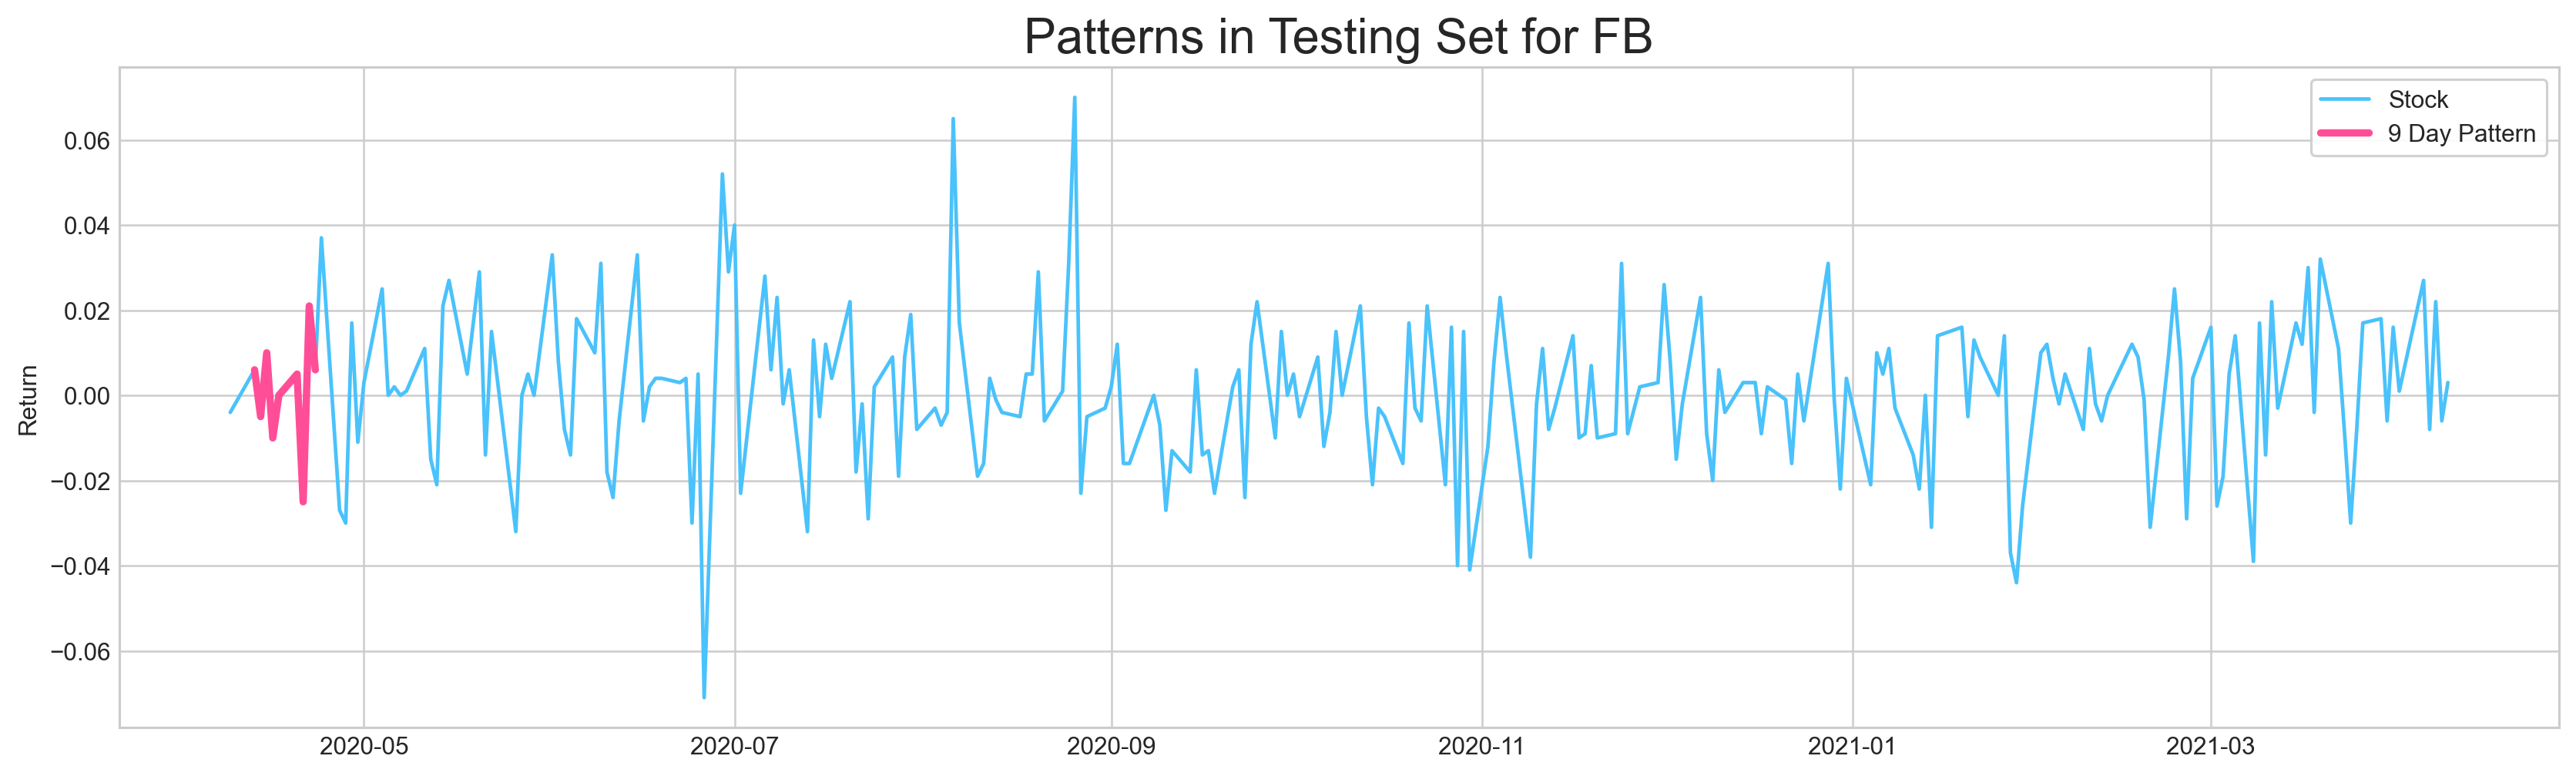

In [6]:
plt.figure(figsize=(18,5))
plt.style.use('seaborn-whitegrid')

plt.plot(stocks[ticker.lower()][window_2:window_1].Return, label='Stock', c=lightblue)
plt.plot(stocks[ticker.lower()][window_2+1:pattern].Return, lw=3, label='{} Day Pattern'.format(step), c=pinkyred)

plt.legend(frameon=True, framealpha=.9, loc=1)
plt.title('Patterns in Testing Set for '+ticker.upper(), fontsize=20)
plt.ylabel('Return')
plt.show()

---
# Evaluate Pattern Matching Technique
---

In [7]:
# turn data into 0 and 1
binary = lambda data: [1 if x > 0 else 0 for x in data]

In [8]:
binary_return = binary(stocks[ticker.lower()].Return.values)

binary_train = binary_return[:window_2]
binary_test = binary_return[window_2:]

check_step = step+1
total_preds = []

for i in range(check_step):
    if i + check_step >= len(binary_test):
        break
    found_patterns = []
    sample = binary_test[i:i+step]
    sample_check = binary_test[i+check_step]
    
    for j in range(len(binary_train) - check_step): 
        if accuracy_score(binary_train[j:j+step], sample) == 1.0:
            found_patterns.append(i)
            
    p = []
    prediction = None
    if len(found_patterns) != 0: 
        for k in found_patterns:
            p.append(binary_train[k+check_step])
        prediction = sum(p)/len(p)
        if sample_check == prediction: 
            total_preds.append(1)
        else:
            total_preds.append(0)
            
accuracy = sum(total_preds)/len(total_preds)
print('Accuracy: {}%'.format(round(accuracy,4)*100))

Accuracy: 33.33%


---
# Matched Patterns
---

In [9]:
start = 1
a = []

sample = binary_test[start:start+step]

for i in range(len(binary_train)-step):
    if accuracy_score(binary_train[i:i+step], sample) == 1.0: 
        a.append(i)
        
a_len = len(a)
print(a_len)

4


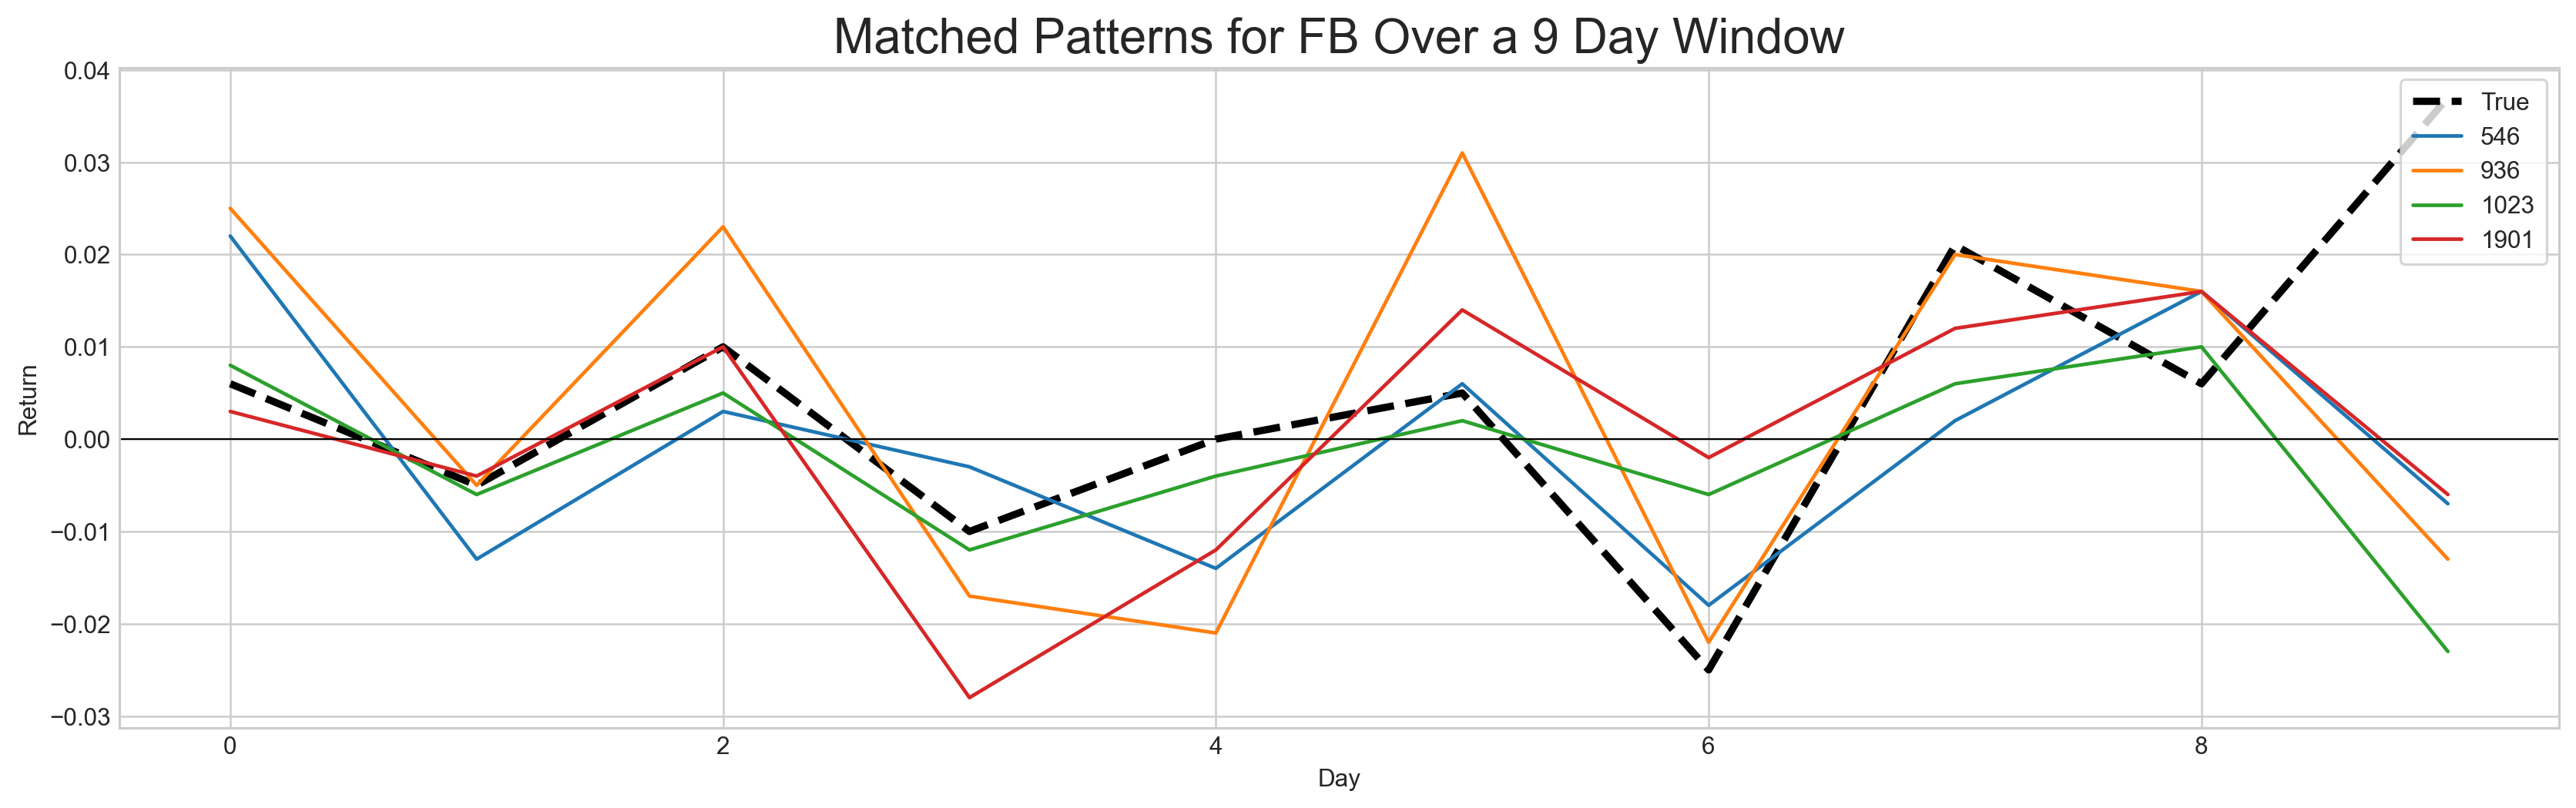

In [10]:
plt.figure(figsize=(18,5))

plt.plot(stocks[ticker.lower()][window_2+start:start+window_2+check_step].Return.values, label='True', ls='--', lw=3, c='k')
[plt.plot(stocks[ticker.lower()].Return[i:i+step+1].values, label=i) for i in a]
plt.axhline(0, c='k', lw=.7)

plt.title('Matched Patterns for {} Over a {} Day Window'.format(ticker.upper(), step), fontsize=20)
plt.xlabel('Day', fontsize=10)
plt.ylabel('Return', fontsize=10)
plt.legend(loc=1, frameon=True,borderpad=.5)
plt.show()

---
# Visual Comparison
---

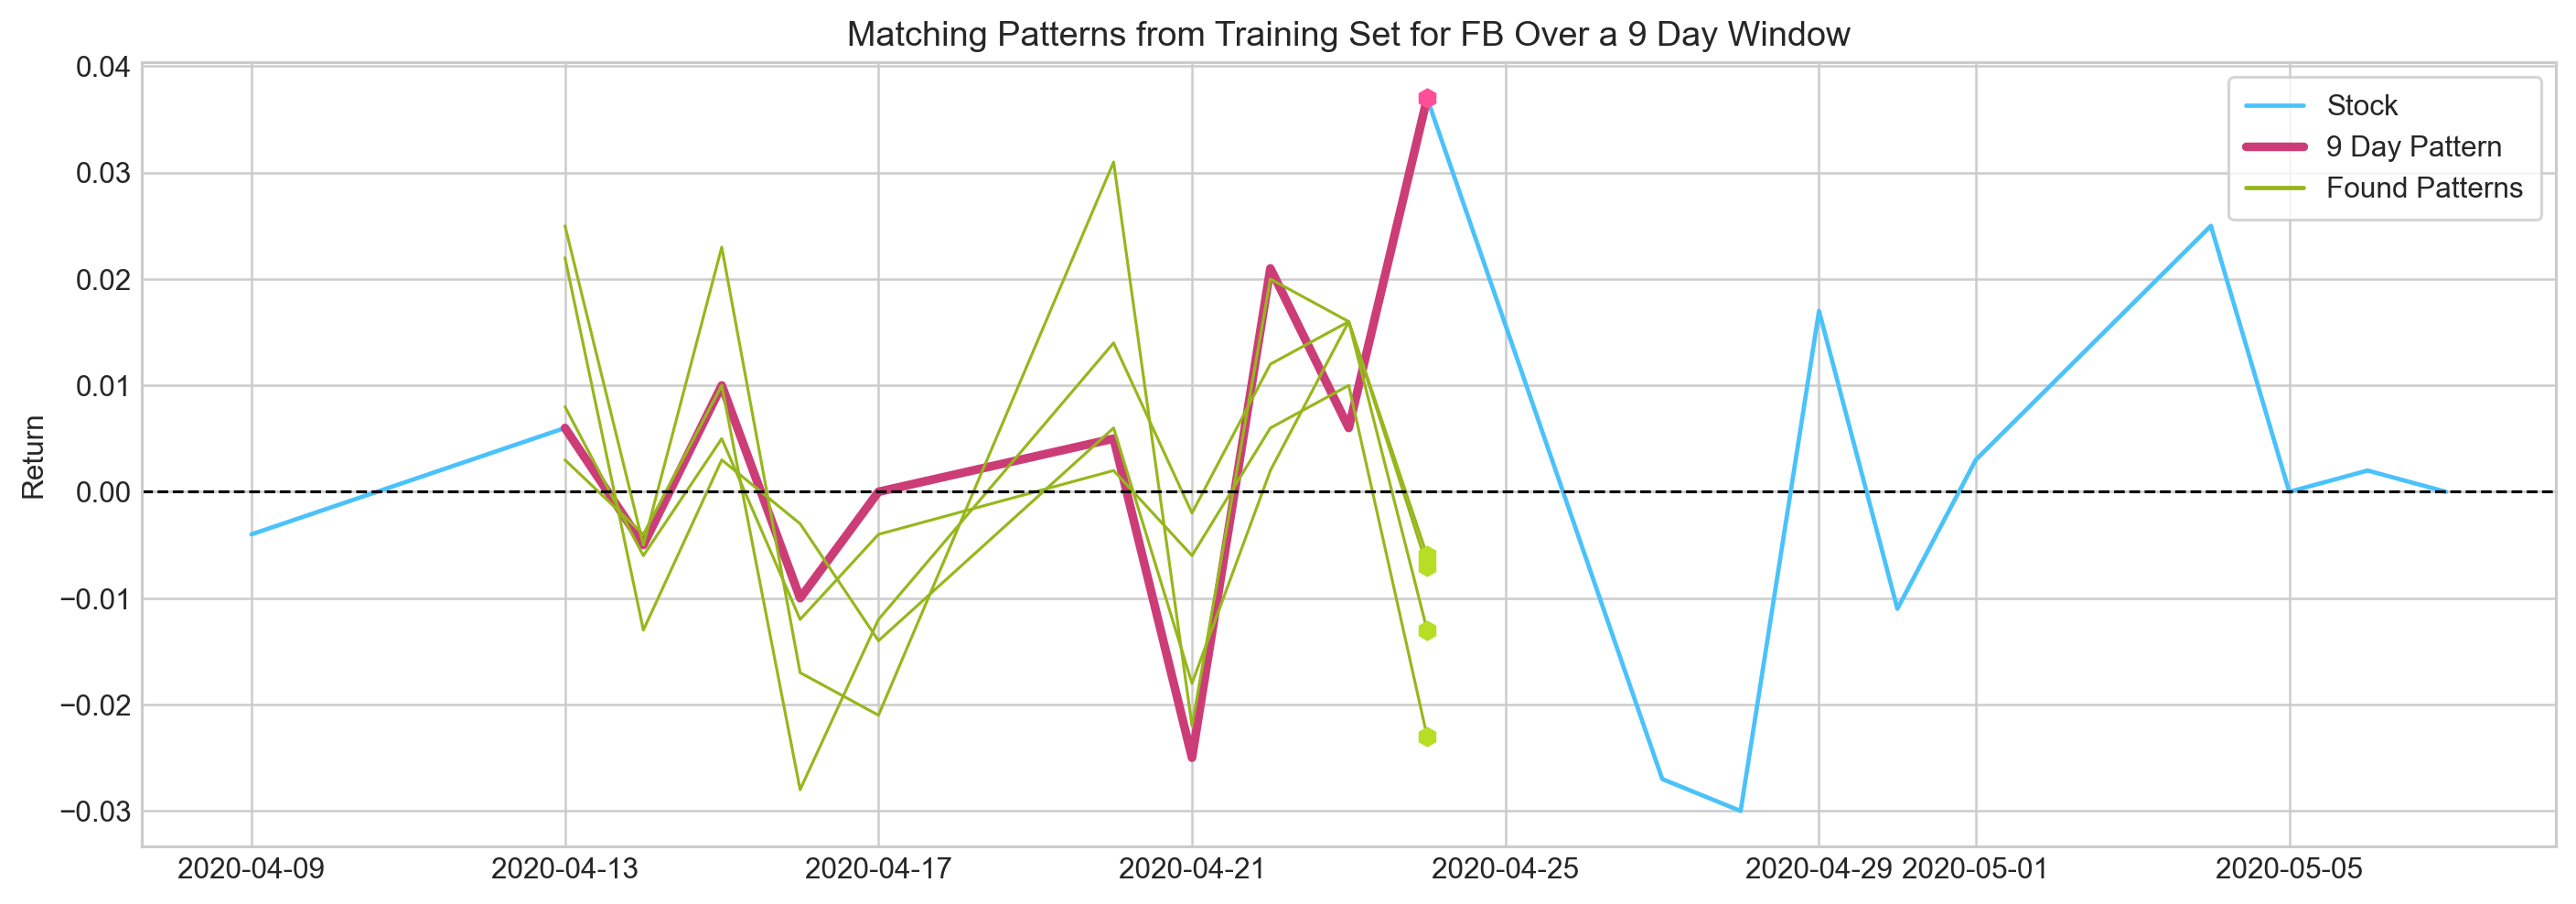

In [13]:
indexes = stocks[ticker.lower()][window_2+1:window_2+check_step+1].Return.index

plt.figure(figsize=(15,5))
plt.plot(stocks[ticker.lower()][window_2:window_2+(check_step*2)].Return, label='Stock', c=lightblue)
plt.plot(stocks[ticker.lower()][window_2+1:window_2+check_step+1].Return, lw=3, label='{} Day Pattern'.format(step), c=darkpink)
plt.plot(stocks[ticker.lower()][window_2+check_step:window_2+check_step+1].Return, 'h', c=pinkyred)

for i in a:
    ret = stocks[ticker.lower()][i:i+check_step].set_index(indexes).Return    
    plt.plot(ret, lw=1, c=darkgreen)
    plt.plot(ret[step:],'h', c=limegreen)
    
plt.plot([],[], label='Found Patterns', c=darkgreen)

plt.axhline(0,c='k', lw=1, ls='--')
plt.legend(frameon=True, borderpad=.6, loc=1)
plt.title('Matching Patterns from Training Set for {} Over a {} Day Window'.format(ticker.upper(), step))
plt.ylabel('Return')
plt.show()